In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.DataFrame= pd.read_csv('/content/drive/My Drive/Master_Thesis/generated_summaries.csv')

In [ ]:
df

,translated_text,is_depression,generated_summary
0,we understand that most people who reply immed...,1,i understand that when someone immediately off...
1,welcome to r depression s check in post a plac...,1,i'm here to welcome you to the r/depression ch...
2,anyone else instead of sleeping more when depr...,1,i stay up all night when i'm depressed to dela...
3,i ve kind of stuffed around a lot in my life d...,1,"i have procrastinated a lot in my life, avoidi..."
4,sleep is my greatest and most comforting escap...,1,i find that sleep is my ultimate escape and so...
...,...,...,...
7726,is that snow,0,i see snow.
7727,moulin rouge mad me cry once again,0,i watched moulin rouge and it made me cry once...
7728,trying to shout but can t find people on the list,0,"i am attempting to call out, but i am unable t..."
7729,ughh can t find my red sox hat got ta wear thi...,0,"i can't find my red sox hat, so i have to wear..."


In [ ]:
# selecting important columns
df_summarized= df.drop('translated_text',axis=1)


In [ ]:
df_summarized=df_summarized[['generated_summary','is_depression']]
df_summarized

,generated_summary,is_depression
0,i understand that when someone immediately off...,1
1,i'm here to welcome you to the r/depression ch...,1
2,i stay up all night when i'm depressed to dela...,1
3,"i have procrastinated a lot in my life, avoidi...",1
4,i find that sleep is my ultimate escape and so...,1
...,...,...
7726,i see snow.,0
7727,i watched moulin rouge and it made me cry once...,0
7728,"i am attempting to call out, but i am unable t...",0
7729,"i can't find my red sox hat, so i have to wear...",0


In [ ]:
df_summarized.to_csv('/content/drive/My Drive/Master_Thesis/new_dataset_generated_summaries.csv',index=False)

In [ ]:
import pandas as pd
df_summarized= pd.read_csv('/content/drive/My Drive/Master_Thesis/new_dataset_generated_summaries.csv')


In [ ]:
import string
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Define regular expression pattern to remove URLs
url_pattern = re.compile(r'https?://\S+|www\.\S+')

def preprocessing(text):
    lower_text = text.lower()
    punctuation_free = "".join([chars for chars in lower_text if chars not in string.punctuation])
    remove_urls = url_pattern.sub('', punctuation_free)
    remove_digits = re.sub(r'\d', '', remove_urls)
    tokenized_text = word_tokenize(remove_digits)
    return tokenized_text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:

# Assuming df_translated_without_tokenization is your input DataFrame with a 'translated_text' column
df_summarized['tokenized_text'] = df_summarized['generated_summary'].apply(preprocessing)
df_translated_with_tokenization = df_summarized.copy()

In [ ]:
mild_depression = {
    'irritability_or_anger': ['irritability', 'anger', 'frustrated', 'annoyed', 'agitated', 'rageful', 'furious',
                              'irate', 'touchy', 'testy', 'enraged', 'incensed', 'livid', 'wrathful',
                              'infuriated', 'fuming', 'seething', 'outraged', 'raging', 'mad', 'upset'],
    'hopelessness': ['hopelessness', 'despair', 'desperation', 'despondency', 'gloom', 'pessimism'],
    'feelings_of_guilt_and_despair': ['guilt', 'despair', 'remorse', 'regret', 'shame', 'sorrow', 'anguish'],
    'self_loathing': ['self-loathing', 'self-hatred', 'self-disgust', 'self-revulsion', 'self-contempt',
                      'worthless', 'hating oneself', 'valueless'],
    'loss_of_interest_in_activities': ['loss of interest', 'apathy', 'indifference', 'disinterest', 'ennui',
                                       'lethargy', 'unconcern', 'detachment', 'nonchalance', 'unenthusiasm'],
    'difficulties_concentrating_at_work': ['unconcentrated', 'distraction', 'absent-mindedness', 'unfocused', 'confusion', 'bemused'],
    'lack_of_motivation': ['listless', 'apathy', 'lethargy', 'indifference', 'passivity', 'inertia', 'unmotivated', 'lackadaisical'],
    'sudden_disinterest_in_socializing': ['antisociality', 'isolation', 'withdrawal', 'reclusiveness', 'solitude', 'loneliness', 'disconnected', 'detachment'],
    'aches_and_pains_with_no_direct_cause': ['aches', 'pains', 'discomfort', 'soreness', 'twinges', 'throbbing', 'stiffness'],
    'daytime_sleepiness_and_fatigue': ['fatigue', 'tiredness', 'exhaustion', 'weariness', 'drowsiness', 'lethargy'],
    'insomnia': ['insomnia', 'sleeplessness', 'restlessness'],
    'appetite_changes': ['appetite', 'changes', 'dysorexia', 'anorexia', 'overeating', 'fluctuations in appetite', 'irregular eating patterns', 'bulimia', 'gluttony', 'cravings', 'satiety', 'malnutrition', 'voracity'],
    'weight_changes': ['thinner', 'slimmer', 'overweight', 'underweight', 'fatter', 'weight', 'obesify', 'fatten'],
    'reckless_behavior': ['reckless', 'risky', 'dangerous', 'self-destructive', 'risk-taking', 'recklessness', 'impulsivity', 'hazardousness', 'adventurousness', 'venturesomeness', 'temerariousness']
}

moderate_depression = {
    'problems_with_self_esteem': ['self-esteem', 'self-worth', 'self-value', 'self-respect', 'insecurity', 'self-doubt', 'inferiority', 'self-deprecation', 'self-criticism', 'self-worthlessness'],
    'reduced_productivity': ['unproductivity', 'inefficient', 'sluggishness', 'lethargy', 'uneffective', 'unproductive', 'ineptitude', 'ineffectiveness', 'sluggishness', 'inefficacy', 'incompetence', 'inactivity', 'laziness', 'inaptitude', 'inertia', 'languor', 'languish', 'stagnate', 'laze', 'wallow', 'slack'],
    'feelings_of_worthlessness': ['unworthy', 'inadequacy', 'insignificance', 'unworthiness', 'degrade', 'belittle', 'disparage', 'devalue', 'invalidate', 'diminish', 'demean', 'humiliate', 'discredit', 'inferiority', 'futility', 'despondency', 'uselessness', 'insufficiency', 'impotence', 'worthlessness', 'pointlessness', 'invalidity'],
    'increased_sensitivities': ['sensitivity', 'hypersensitivity', 'reactivity', 'hyperesthesia', 'hyperaesthesia', 'hyperresponsiveness', 'overreactivity', 'sensitive'],
    'excessive_worrying': ['worry', 'anxiety', 'concern', 'apprehension', 'stress', 'distress', 'torment', 'fret', 'overthink', 'overanxiety', 'overthinking', 'hyperconcern', 'angst']
}

severe_depression = {
    'delusions': ['hallucinations', 'fantasies', 'illusions', 'misconceptions', 'fantasize', 'imaginate', 'conjure', 'visualize', 'delude', 'illusion', 'daydream'],
    'feelings_of_stupor': ['apathy', 'daze', 'torpor', 'coma', 'stupor', 'lethargy', 'stupification', 'numbedness', 'haze', 'fog', 'languor', 'unaware', 'dullness', 'hibernation', 'inertia', 'languidness', 'somnolence', 'lull', 'unresponsiveness', 'numbness', 'unconscious', 'insensibility', 'oblivion'],
    'hallucinations': ['visions', 'illusions', 'phantoms', 'apparitions'],
    'suicidal_thoughts_or_behaviors': ['suicide', 'self-murder', 'self-harm', 'desperation', 'hopelessness', 'despair', 'self-killing', 'self-fatality', 'self-death']
}

In [ ]:
# Function to get synonyms for a word
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    return synonyms

# Expanding depression keywords with synonyms
def expand_keywords(depression_dict):
    expanded = {}
    for key, keywords in depression_dict.items():
        expanded[key] = set()
        for keyword in keywords:
            expanded[key].update(get_synonyms(keyword))
        expanded[key].update(keywords)  # Ensure original keywords are included
    return expanded

In [ ]:
expanding_words_mild = expand_keywords(mild_depression)
expanding_words_moderate = expand_keywords(moderate_depression)
expanding_words_severe = expand_keywords(severe_depression)



In [ ]:
lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens with POS tagging
def lemmatize_tokens(tokens):
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    return lemmas

# Apply lemmatization function to column of dataframe
df_summarized['text_lemmatized'] = df_summarized['tokenized_text'].apply(lemmatize_tokens)

# Function to lemmatize each keyword in a list
def lemmatize_keywords(keywords):
    lemmatized_keywords = []
    for keyword in keywords:
        tokens = word_tokenize(keyword)
        lemmatized_tokens = lemmatize_tokens(tokens)
        lemmatized_keyword = ' '.join(lemmatized_tokens)
        lemmatized_keywords.append(lemmatized_keyword)
    return lemmatized_keywords

lemmatized_mild_depression = {category: lemmatize_keywords(keywords) for category, keywords in mild_depression.items()}
lemmatized_moderate_depression = {category: lemmatize_keywords(keywords) for category, keywords in moderate_depression.items()}
lemmatized_severe_depression = {category: lemmatize_keywords(keywords) for category, keywords in severe_depression.items()}




In [ ]:
# Function to assign severity labels
def assign_severity_label(row):
    if row['is_depression'] == 0:
        return 'not depressed'

    lemmatized_text = row['text_lemmatized']

    # Check for severe keywords
    for word in lemmatized_text:
        for key, keywords in expanding_words_severe.items():
            if word in keywords:
                return 'severe'

    # Check for moderate keywords
    for word in lemmatized_text:
        for key, keywords in expanding_words_moderate.items():
            if word in keywords:
                return 'moderate'

    # If no severe or moderate keywords found, label as mild
    return 'mild'

# Assign severity labels to each post
df_summarized['severity_label'] = df_summarized.apply(assign_severity_label, axis=1)

In [ ]:
# Count the occurrences of each class in the 'severity_label' column
severity_distribution = df_summarized['severity_label'].value_counts()

# Print the distribution
print(severity_distribution)

severity_label
not depressed    3900
moderate         1461
mild             1326
severe           1044
Name: count, dtype: int64


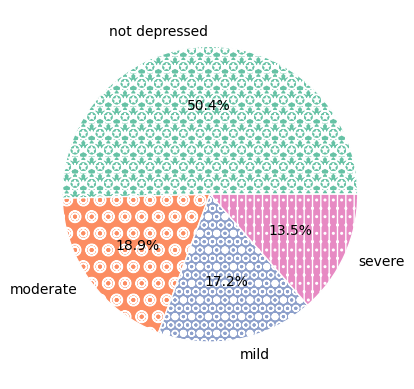

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Get a list of colors
colors=sns.color_palette("Set2")
labels = severity_distribution.loc[['not depressed', 'moderate', 'mild','severe']].index


# Your code for plotting the pie chart
fix, ax = plt.subplots()
autopct_format = lambda pct: f"{pct:.1f}%"

ax.pie(severity_distribution, colors=colors,
       wedgeprops={"linewidth": 1, "edgecolor": "white"},
       labels=labels, autopct=autopct_format, hatch=['**O', 'oO', 'O.O', '.||.'])
plt.savefig('/content/drive/My Drive/Master_Thesis/imbalncing.png')
plt.show()

In [ ]:
# labeling to 0,1..
def labeling(severity_label):
  if severity_label =='not depressed':
    return 0
  elif severity_label =='mild':
    return 1
  elif severity_label =='moderate':
    return 2
  elif severity_label =='severe':
    return 3
df_summarized['labels']=df_summarized['severity_label'].apply(labeling)

In [ ]:
df_summarized

,generated_summary,is_depression,tokenized_text,text_lemmatized,severity_label,labels
0,i understand that when someone immediately off...,1,"[i, understand, that, when, someone, immediate...","[i, understand, that, when, someone, immediate...",moderate,2
1,i'm here to welcome you to the r/depression ch...,1,"[im, here, to, welcome, you, to, the, rdepress...","[im, here, to, welcome, you, to, the, rdepress...",mild,1
2,i stay up all night when i'm depressed to dela...,1,"[i, stay, up, all, night, when, im, depressed,...","[i, stay, up, all, night, when, im, depressed,...",moderate,2
3,"i have procrastinated a lot in my life, avoidi...",1,"[i, have, procrastinated, a, lot, in, my, life...","[i, have, procrastinate, a, lot, in, my, life,...",moderate,2
4,i find that sleep is my ultimate escape and so...,1,"[i, find, that, sleep, is, my, ultimate, escap...","[i, find, that, sleep, be, my, ultimate, escap...",mild,1
...,...,...,...,...,...,...
7726,i see snow.,0,"[i, see, snow]","[i, see, snow]",not depressed,0
7727,i watched moulin rouge and it made me cry once...,0,"[i, watched, moulin, rouge, and, it, made, me,...","[i, watch, moulin, rouge, and, it, make, me, c...",not depressed,0
7728,"i am attempting to call out, but i am unable t...",0,"[i, am, attempting, to, call, out, but, i, am,...","[i, be, attempt, to, call, out, but, i, be, un...",not depressed,0
7729,"i can't find my red sox hat, so i have to wear...",0,"[i, cant, find, my, red, sox, hat, so, i, have...","[i, cant, find, my, red, sox, hat, so, i, have...",not depressed,0


In [ ]:
# I droped them because later affter data augmentation I will have new sentences I have to do tha from scratch:
df_labeled= df_summarized.drop(columns=['is_depression','tokenized_text','text_lemmatized','severity_label'])
df_labeled

,generated_summary,labels
0,i understand that when someone immediately off...,2
1,i'm here to welcome you to the r/depression ch...,1
2,i stay up all night when i'm depressed to dela...,2
3,"i have procrastinated a lot in my life, avoidi...",2
4,i find that sleep is my ultimate escape and so...,1
...,...,...
7726,i see snow.,0
7727,i watched moulin rouge and it made me cry once...,0
7728,"i am attempting to call out, but i am unable t...",0
7729,"i can't find my red sox hat, so i have to wear...",0


In [ ]:
# it was appering in class 0
df_labeled['generated_summary'] = df_labeled['generated_summary'].replace("please provide abstractive summary"," ", regex=True)
df_labeled['generated_summary'] = df_labeled['generated_summary'].replace("abstractive summary"," ", regex=True)
df_labeled['generated_summary'] = df_labeled['generated_summary'].replace("abstractive"," ", regex=True)
df_labeled['generated_summary'] = df_labeled['generated_summary'].replace("summary"," ", regex=True)

[2 1 3 0]


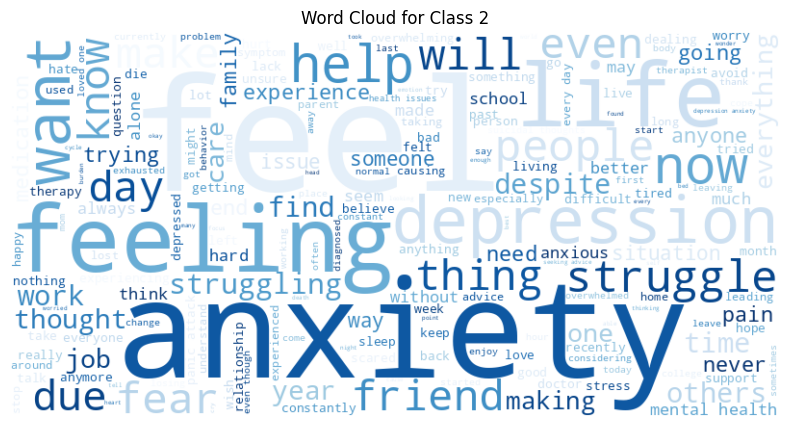

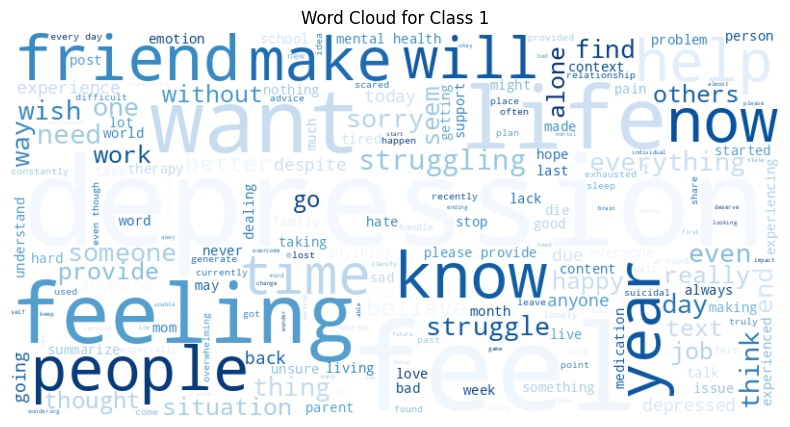

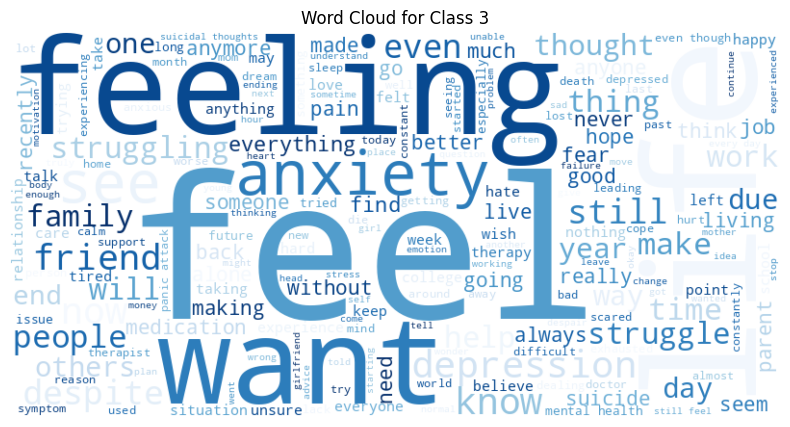

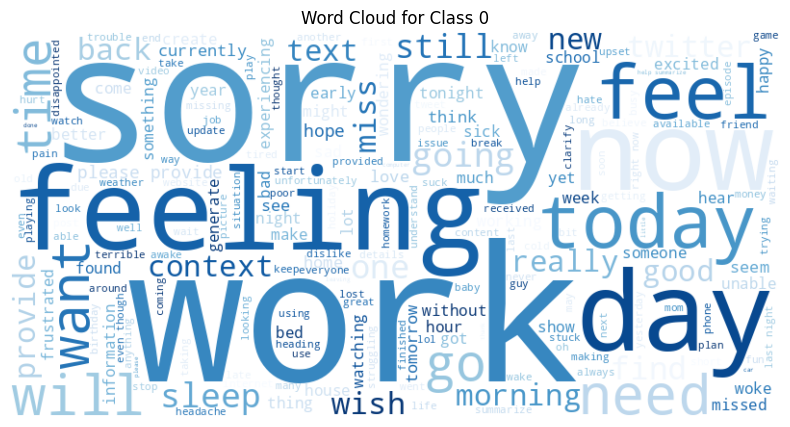

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

unique_classes = df_labeled['labels'].unique()
print(unique_classes)
# Generate a word cloud for each class
for class_name in unique_classes:
# Initialize an empty string to store text data for the current class
    text_data = ""

    # Iterate through each row in the DataFrame
    for index, row in df_labeled.iterrows():
        # Check if the current row belongs to the current class
        if row['labels'] == class_name:
            # Concatenate the 'generated_summary' text to the existing text data
            text_data += row['generated_summary'] + " "


    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color ='white',colormap='Blues').generate(text_data)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Class {class_name}')
    plt.axis("off")
    plt.savefig('/content/drive/My Drive/Master_Thesis/Word Cloud for Class {}.png'.format(class_name))  # Save the plot with filename based on class number

    plt.show()



In [ ]:
df_labeled.to_csv('/content/drive/My Drive/Master_Thesis/new_labeled_dataset.csv',index=False)

Data Augmentation